<a href="https://colab.research.google.com/github/amirmohammadkalateh/Learning_rate_schedule/blob/main/1cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

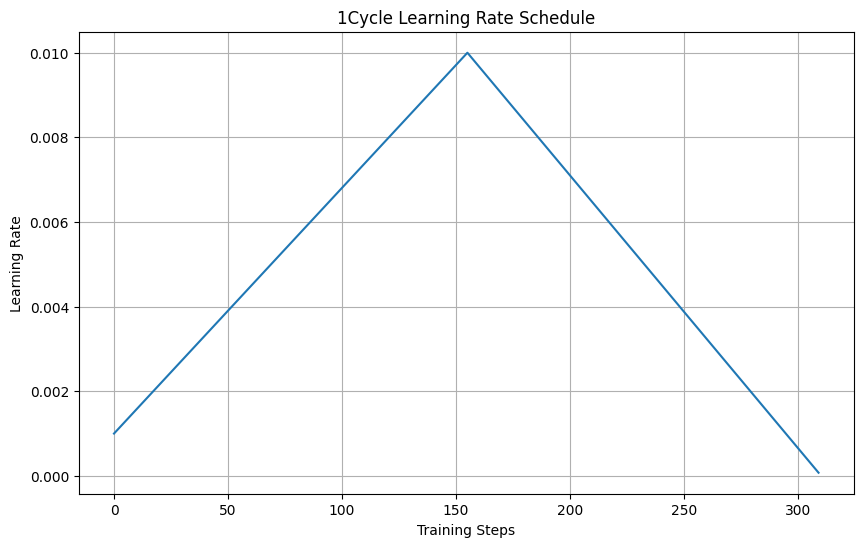

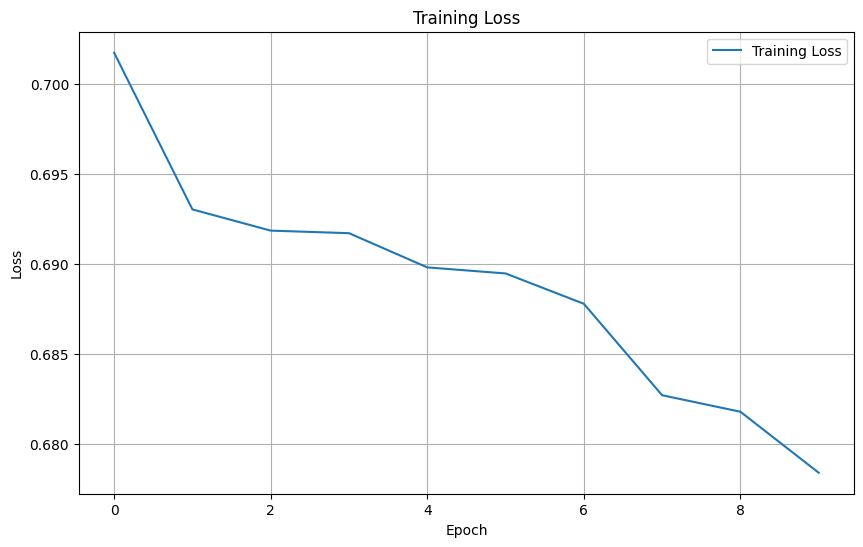

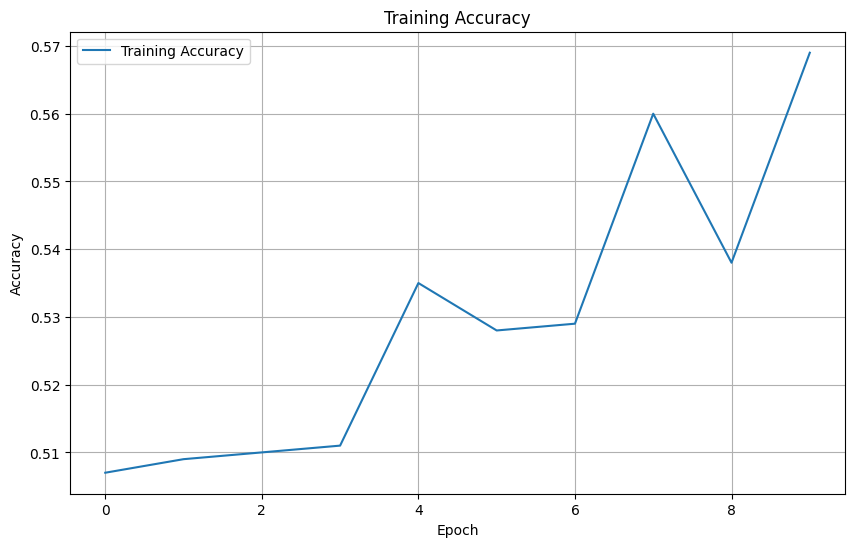

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

# 1. Define a Simple ANN Model (Sequential API)
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10,)), # Input layer with 10 features
    keras.layers.Dense(8, activation='relu'),                  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')                 # Output layer (binary classification)
])

# 2. Define the Optimizer and Loss Function
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.BinaryCrossentropy()

# 3. Define the 1Cycle Learning Rate Schedule (without momentum)
def create_one_cycle_lr_schedule(epochs, steps_per_epoch, max_lr):
    """
    Creates a 1Cycle learning rate schedule (without momentum).

    Args:
        epochs (int): Total number of training epochs.
        steps_per_epoch (int): Number of steps (batches) in one epoch.
        max_lr (float): Maximum learning rate.

    Returns:
        function: A learning rate scheduler function.
    """
    total_steps = epochs * steps_per_epoch
    phase1_steps = total_steps // 2
    phase2_steps = total_steps - phase1_steps

    def lr_schedule(epoch, step):
        global_step = epoch * steps_per_epoch + step

        if global_step < phase1_steps:
            # Increasing learning rate
            ratio = global_step / phase1_steps
            lr = (1 - ratio) * (max_lr / 10) + ratio * max_lr
        else:
            # Decreasing learning rate
            ratio = (global_step - phase1_steps) / phase2_steps
            lr = (1 - ratio) * max_lr + ratio * (max_lr / 1000) # Decrease significantly
        return lr

    return lr_schedule

# 4. Create Dummy Data
np.random.seed(42)
num_samples = 1000
X_train = np.random.rand(num_samples, 10)
y_train = np.random.randint(0, 2, num_samples)

# 5. Set Training Parameters
epochs = 10
batch_size = 32
steps_per_epoch = X_train.shape[0] // batch_size
max_learning_rate = 0.01

# 6. Create the Learning Rate Scheduler Callback
one_cycle_lr_schedule = create_one_cycle_lr_schedule(epochs, steps_per_epoch, max_learning_rate)
lr_callback = LearningRateScheduler(one_cycle_lr_schedule)

# 7. Compile the Model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# 8. Train the Model with the Learning Rate Scheduler
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[lr_callback], verbose=0)

# 9. Visualize the Learning Rate Schedule
learning_rates = []
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        learning_rates.append(one_cycle_lr_schedule(epoch, step))

plt.figure(figsize=(10, 6))
plt.plot(learning_rates)
plt.title('1Cycle Learning Rate Schedule')
plt.xlabel('Training Steps')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()

# 10. (Optional) Visualize Training Loss and Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()